# The benefits of functions
-----
When we first start writing code, we learn how to do it line-by-line. In other words, when we write the specific command we want to use right in the script, then press *Enter* and go to the next line, to write another command. Our first code often looks like it has a millio if statements. We quickly progress to loops, but we often still have a lot of repetition.

There is nothing wrong with the line-by-line approach with repetition, its a great way to experiment and learn. However, what happens when you need to run the same types of commands (i.e. the code) a second time in your script? Well you copy paste the set of commands from the first time you used them, again lower in your script, right? Simple repetition is great, but what happens if you find out later you made a mistake in that copy-pasted code -- you will have to go through and fix it twice (or worse, more)! 

Alternatively, when you are writing your script, you realize you have to do almost the same thing 2 or more times, but they are slightly different each time. You can write out the code differently for each time you need it. Again, this works fine, your chances of making mistakes, later finding those mistakes and debugging them all the harder. And not even mentioning that more code makes your computer slower when running your script as it needs to keep all those instructions in memory! 

**Note** -- this tutorial is on the benefits of functions, less how they are made. For that, I recommend [this intro to functions](http://introtopython.org/introducing_functions.html)!

-----
## lotto generator example

Lets say we want to write a script that will generate a **potential** winning lotto ticket. A common type is Lotto 6-49 or 6 numbers picked with the largest being 49. A line-by-line approach could look like this:

In [407]:
import random

lotto = [] #we will save our picked number in this list

#first we generate the first number and save it -- all numbers between 1 and 49 are availible
one = random.randint(1, 49)
lotto.append(one)
    
#we generate the second number    
two = random.randint(1, 49)
#now we have to test it -- if it has already been picked -- i.e. if it is in our list of picked 
#numbers, then we have to keep picking until we get one that is not -- which we save
while two in lotto: 
    two = random.randint(1, 49)
lotto.append(two)
    
#now repeat the very same thing for the third
three = random.randint(1, 49)
while three in lotto:
    three = random.randint(1, 49)
lotto.append(three)

#and the fourth
four = random.randint(1, 49)
while four in lotto:
    four = random.randint(1, 49)
lotto.append(four)

#and the fifth
five = random.randint(1, 49)
while five in lotto:
    five = random.randint(1, 49)
lotto.append(five)

#and the sixth
six = random.randint(1, 49)
while six in lotto:
    six = random.randint(1, 49)
lotto.append(six)

#now we sort the results in increasing order and see what we got:
print(sorted(lotto))

[6, 10, 25, 30, 31, 42]


Awesome, it works!

So a couple things we can do with this script to imrove it:
1. We actually wrote the very same generator loop 5 times! What if we made a copy-pasting mistake? Or, what if the way we set up our loop was not correct, and we had to re-write it 5 times! Or even as simple as writing 59 instead of 49 somewhere...
    * So writing this code **once** instead of **5 times** would be ideal!
2. If you think about it, the first number actually has the same test as the next 5 -- its just that we knew ourselves that we didn't need to test it. However there is nothing wrong with doing it, obviously the number will be gerated only once! In orther words: 
```python
one = random.randint(1, 49)
#we can write the loop, but it will never run as 'lotto' is empty so obviously 'one' is NOT in 'lotto'
while one in lotto: 
    one = random.randint(1, 49)
lotto.append(one)
```

So this is where we use a function in order to simplify the script:

In [415]:
import random

lotto = [] #we will save our picked number in this list

def generator(lotto):
    """
    we define our generator function that:
        - has an input of 'lotto_picks', i.e. the ones we have saved
        - returns one output -- the new number -- that we know hasn't been picked yet! 
    """
    num = random.randint(1,49)
    while num in lotto:
        num = random.randint(1,49)
    return num

#first number
lotto.append(generator(lotto))
#second
lotto.append(generator(lotto))
#third and so on
lotto.append(generator(lotto))
lotto.append(generator(lotto))
lotto.append(generator(lotto))
lotto.append(generator(lotto)) 

#now we sort the results in increasing order and see what we got:
print(sorted(lotto))

[5, 7, 21, 31, 40, 49]


Great!! 

We simplified our code -- now we don't write the number generator many many times! Instead of calling the generator manually 6 times however, lets make it a loop! Lets also make it a function, as its worth isolating from the rest of the code

In [419]:
import random

def generator(lotto):
    """
    we define our generator function that:
        - has an input of 'lotto_picks', i.e. the ones we have saved
        - returns one output -- the new number -- that we know hasn't been picked yet! 
    """
    num = random.randint(1,49)
    while num in lotto:
        num = random.randint(1,49)
    return num


def main():
    """
    this function will contain our loop and our print statement of the results
    """
    lotto = [] #we will save our picked number in this list
    for i in range(1,7):
        lotto.append(generator(lotto))
    print(sorted(lotto_picks))

#at the bottom of the script -- we call the main() function
main()

[4, 5, 14, 30, 42, 50]


From this example, functions can be used to deal with and simplify two common occurences in code:
* When you have a set of code that is similar or the same executed more than once -- so you put this code in a function that you call whenever you need to execute this code!
* Alternatively, you code often has logical tasks that stand alone. In our example the main function contained the initator for the number generator. 
    * One alterior reason to do this -- especially in our example -- is that you might have other commands in your script, and isolating chunks into one function makes it easier to debug/test that one in isolation from the other commands

All this is great, as you noticed, we hard coded the fact that our lotto is 6-49. What happens if we want to do a few other things with the code? For example:
* We also want to test Lotto Max or 7-49, or others
* We want our script to print out details about the lottery

The latter can do by creating a function that will have some print statements. However if we want to do the former, we have to re-write the code as many times as we need it!

## Enter objects!

How could we do it? Lets say we:
1. Define a set of instructions/schematic of what a lotto is
    * this schematic will have a basic structure, but can be modified in specific ways to make it general. In other words, we can use the schematic to create both a Lotto 6-49 or Lotto MAX (7-49)
2. Create a separate instance of the schematic -- making it specific to Lotto 6-49
3. Make a separate instance of the schematic -- this time for Lotto MAX!
-------------
A *schematic* in python is called a **class**, an instance is an **object**!


In [590]:
import random

class Lottery:
    """
    The Lottery class will be our general schematic for all lotter types. 
    """
    def __init__(self, name, number_of_picks, max_number):
        """
        The __init__ is the default function that will be run whenever you create an instance of Lottery,
        hence the commands that you put here are generally going to be saved as part of that instance. 
        
        In our case, we will take two inputs -- the number of picks (6, 7, etc) and the max number that can 
        be picked (49?)
        
        You will notice the weird self mentioned everywhere -- this allows us to save various things 
        (functions or variables) as belonging to this instance of the schematic. Otherwize, python will forget 
        them afterwords...
        """
        self.name = name
        self.number_of_picks = number_of_picks
        self.max_number = max_number
        
    def Describe(self):
        """
        Lets say we want to describe in one sentence what the lottery we will make is
        """
        print("This is {}, {} numbers are picked, ranging from 1 to {}".format(
            self.name,
            self.number_of_picks,
            self.max_number))
        
    def generator(self, lotto):
        """
        we define our generator function that:
            - has an input of 'lotto_picks', i.e. the ones we have saved
            - returns one output -- the new number -- that we know hasn't been picked yet! 
        """
        num = random.randint(1,self.max_number)
        while num in lotto:
            num = random.randint(1,self.max_number)
        return num


    def Generate_number(self):
        """
        this function will contain our loop and our print statement of the results
        """
        lotto = [] #we will save our picked number in this list
        for i in range(1,(self.number_of_picks+1)):
            lotto.append(generator(lotto))
        print("A possible winning combination for {} is {}".format(self.name, sorted(lotto)))

Above, we layed out the schemic for various lotteries. How do we interact with this object now? Well its a tad different than with functions because **first** we have to create a specific instance, or object, of the class, and then we can tell this **object** to do whatever it can do:

In [591]:
#Lets create an instance of Lotto 6-49
Lottery1 = Lottery(name="Lotto 6-49", number_of_picks=6, max_number=49)

#lets also create in parallel an instance of Lotto Max
Lottery2 = Lottery(name="Lotto MAX", number_of_picks=7, max_number=49)

#now lets use the define 'Describe' function for both
Lottery1.Describe()
Lottery2.Describe()

This is Lotto 6-49, 6 numbers are picked, ranging from 1 to 49
This is Lotto MAX, 7 numbers are picked, ranging from 1 to 49


Great! So we see that they are running completelly separately! 'Lottery1' doesnt share variables with 'Lottery2', only sharing the underlying 'class' structure, i.e. the schematic of how it will work. 

As an example, lets generate a set of potential winning numbers for both:

In [592]:
Lottery1.Describe()
Lottery1.Generate_number()

print("-"*10)
Lottery2.Describe()
Lottery2.Generate_number()

This is Lotto 6-49, 6 numbers are picked, ranging from 1 to 49
A possible winning combination for Lotto 6-49 is [4, 23, 25, 33, 34, 40]
----------
This is Lotto MAX, 7 numbers are picked, ranging from 1 to 49
A possible winning combination for Lotto MAX is [10, 11, 15, 16, 31, 32, 40]


### A few details on what was done -- what does self mean?

So now that we see how the class works, lets dive in a little deeper into the **self** that you see used throughout the class.  So what is it? Conceptually, **self** is a reference to the instance of the class itself -- hence any methods/function, or variable that references **self** in the schematic can be accessed and used by the instance. Otherwize, the instance can't really use it and will give you an error if you try.  

Lets say you define a variable within a function without using **self.**. If you press *Tab* on an instance of your class (which usually allows you to see all methods/variables defined under it), you will not see this variable!! In our example above, the generator has **num** referenced without **self**:

```python
    num = random.randint(1,self.max_number)
    while num in lotto:
        num = random.randint(1,self.max_number)
    return num
```
But we cannot see **num**:
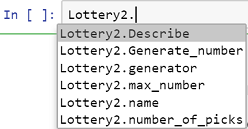

In the very same way, methods/functions must include **self** in order to be availible for the instance! 

Hence the steps that must be followed for the **self** are:

```python
def function(self):
    #functions must include self as the first input var
    return None

def function2(self):
    self.var = 1 #variables start with self -- and they are availible in the global space of the instance
    return "done"
    
def function3(self):
    print(self.function2())
    #when calling functions within a class, start with self. then the name of the function and do not add 
    #the self inside the brackets
```

It is actually a bit more complicated -- if you want to get into it. There are also *class* and *static* methods, along with the *instance* ones requiring different input to just **self**... but I would recommend just adding **self** everywhere for now -- as in almost all cases, **self** will solve your problems. For more info on these other methods, see [this](https://medium.com/quick-code/understanding-self-in-python-a3704319e5f0), followed by [this](https://realpython.com/instance-class-and-static-methods-demystified/) blog. 

Awesome!! 

Lets make 2 changes to our **class** to add some more functionality:
* we will use underscores to underly "supportive" functions or variables intead of always being availile
* make 2 new functions--one that will deterime the probability of winning, and another give you a recommendation of whether to buy a lottery ticket or not!

We will do the latter using the statistical formula to determine the chances of wining:
* the overall formula being:
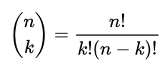
* as an example for 6-49, it is:
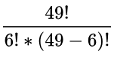

To determine whether you should buy a ticket, lets use the [expected value](https://en.wikipedia.org/wiki/Expected_value) approach. In other words the *probability* of an event is multiplied by the *outcome* of the event, which is compared to the cost of taking the action. If the expected value is larger, than it makes logical sense to take the action, otherwize no! 

In [593]:
import random, math

class Lottery:
    """
    The Lottery class will be our general schematic for all lotter types. 
    """
    def __init__(self, name, number_of_picks, max_number):
        """
        The __init__ is the default function that will be run whenever you create an instance of Lottery,
        hence the commands that you put here are generally going to be saved as part of that instance. 
        
        In our case, we will take two inputs -- the number of picks (6, 7, etc) and the max number that can 
        be picked (49?)
        
        You will notice the weird self mentioned everywhere -- this allows us to save various things 
        (functions or variables) as belonging to this instance of the schematic. Otherwize, python will forget 
        them afterwords...
        """
        self.name = name
        self.number_of_picks = number_of_picks
        self.max_number = max_number
        #to call a function within a class you need to start with self
        self.__determine_changes_of_winning__()
        
    def Describe(self):
        """
        Lets say we want to describe in one sentence what the lottery we will make is
        """
        print("This is {}, {} numbers are picked, ranging from 1 to {}".format(
            self.name,
            self.number_of_picks,
            self.max_number))
        
    def __generator__(self, lotto):
        """
        we define our generator function that:
            - has an input of 'lotto_picks', i.e. the ones we have saved
            - returns one output -- the new number -- that we know hasn't been picked yet! 
        """
        num = random.randint(1,self.max_number)
        while num in lotto:
            num = random.randint(1,self.max_number)
        return num


    def Generate_number(self):
        """
        this function will contain our loop and our print statement of the results
        """
        lotto = [] #we will save our picked number in this list
        for i in range(1,(self.number_of_picks+1)):
            lotto.append(generator(lotto))
        print("A possible winning combination for {} is {}".format(self.name, sorted(lotto)))
        
    def __determine_changes_of_winning__(self):
        """
        Use the formula to determine the chances of winning
        """
        self.one_in_x = (math.factorial(self.max_number))/(
                        math.factorial(self.number_of_picks)*(
                            math.factorial(self.max_number-self.number_of_picks)))
        self.chance = 1/self.one_in_x
        
    def Should_I_buy(self, cost_of_ticket, potential_winnigs):
        exp_value = self.chance*potential_winnigs
        if cost_of_ticket < exp_value:
            print("Heck yea! With any potential pot over ${:,} it makes sense for you to play!".format(
                self.one_in_x*cost_of_ticket))
            print("In terms of statistics, your expected value of winning in this case is ${:.2}".format(exp_value))
            self.Generate_number()
        else:
            print("Naaa, don't play in this case. You are only wasting your money")
            print("The pot has to be at least ${:,} for it to make sense to play...".format(self.one_in_x*cost_of_ticket))

So lets whether we buy tickets!

In [594]:
#Lets create an instance of Lotto 6-49
Lottery1 = Lottery(name="Lotto 6-49", number_of_picks=6, max_number=49)

#lets also create in parallel an instance of Lotto Max
Lottery2 = Lottery(name="Lotto MAX", number_of_picks=7, max_number=49)

#now lets use the define 'Describe' function for both
Lottery1.Should_I_buy(cost_of_ticket=3, potential_winnigs=50000000)
print("-"*5)
Lottery2.Should_I_buy(cost_of_ticket=5, potential_winnigs=50000000)

Heck yea! With any potential pot over $41,951,448.0 it makes sense for you to play!
In terms of statistics, your expected value of winning in this case is $3.6
A possible winning combination for Lotto 6-49 is [2, 4, 9, 25, 30, 34]
-----
Naaa, don't play in this case. You are only wasting your money
The pot has to be at least $429,502,920.0 for it to make sense to play...


With all that done with, what else is there in objects that is important and why you would use them?

There are a few reasons:
* **Cross-contamination of varaiables** -- because variables in an object (i.e. instance) are completelly isolated from the rest of the global/local variables of your script, isolating several methods into an object makes it less likely that you will accidentally cross-contaminate your variables! 
* **Its neater and easier to debug!** Because classes have *__init__*, and detailed methods/functions that are isolated from other scripts (see above point on cross-contamination), it makes it easier and neater to write up some classes, test each to see that it works as expected, and then put them together to do something. \
    * It also makes it easier to write code! Once you define a class, you can write some documentation/expanation on how it behaves -- so its easy to use later! You don't have to re-read the code every time to check that nothing will accidentally break or not work as expected. Hence you can scale better!
* **It allows you to work with others!** Once you divide a complex problem/program into a set of objects, you can define what each will do and how they will work -- then separate the work. It becomes easier to work in a group. And if you working alone, see above points about documentation and easier scaling.

There are probably other points, but I think that gave you a walkthrough -- now go make some objects!